Setting up PennyLane

In [ ]:
!pip install pennylane

In [3]:
import pennylane as qml
from pennylane import numpy as np

num_wires = 5
dev = qml.device("default.qubit", wires=num_wires, shots=1)

Defining our lock function

In [6]:
def quantum_lock(secret_key):
    return qml.FlipSign(secret_key, wires=list(range(1, num_wires)))

Building the key

In [2]:
def build_key(key):
    return qml.BasisState(key, wires=list(range(1, num_wires)))

Now we’ll put it all together to build our quantum locking mechanism

In [5]:
@qml.qnode(dev)
def quantum_locking_mechanism(lock, key):
    build_key(key)
    qml.Hadamard(wires=0)  # Hadamard on ancilla qubit
    qml.ctrl(lock, control=0)  # Controlled unitary operation
    qml.Hadamard(wires=0)  # Hadamard again on ancilla qubit
    return qml.sample(wires=0)


def check_key(lock, key):
    if quantum_locking_mechanism(lock, key) == 1:
        print("Great job, you have uncovered the mysteries of the quantum universe!")
    else:
        print("Nice try, but that's not the right key!")

Opening the Quantum Lock

Great job, you have uncovered the mysteries of the quantum universe!


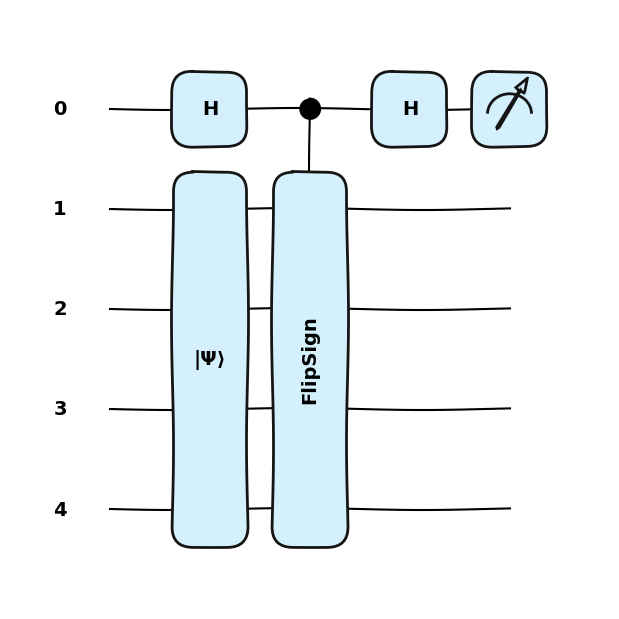

In [8]:
secret_key = np.array([0, 1, 1, 1])
lock = quantum_lock(secret_key)

_ = qml.draw_mpl(quantum_locking_mechanism, style="pennylane")(lock, secret_key)

check_key(lock, secret_key)

What happens with an incorrect quantum key?

In [9]:
incorrect_key = np.array([1, 1, 1, 1])

check_key(lock, incorrect_key)

Nice try, but that's not the right key!
